In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(199)

# [1] MCirreducibleR101

Generating initial probability matrix

In [2]:
statenames = ["Vanilla", "Chocolate", "Mixed"]

Ice = pd.DataFrame([[0, .5, .5], [1, 0, 0], [1, 0, 0]])
Ice.columns = statenames
Ice.index = statenames

In [3]:
Ice

,Vanilla,Chocolate,Mixed
Vanilla,0,0.5,0.5
Chocolate,1,0.0,0.0
Mixed,1,0.0,0.0


In [4]:
NewIce = Ice.copy()
Nmax = 30

In [5]:
piMat = [0] * Nmax
for i in range(Nmax):
    piMat[i] = [0]*3

In [6]:
piMat[0] = [0.1, 0.6, 0.3]

In [7]:
piMat = np.array(piMat)

In [8]:
for ii in range(Nmax):
    piMat[ii] = piMat[0] @ NewIce
    OldIce = NewIce.copy()
    NewIce = Ice.dot(OldIce)
    print(ii)
    print(NewIce)
piMat

0
           Vanilla  Chocolate  Mixed
Vanilla        1.0        0.0    0.0
Chocolate      0.0        0.5    0.5
Mixed          0.0        0.5    0.5
1
           Vanilla  Chocolate  Mixed
Vanilla        0.0        0.5    0.5
Chocolate      1.0        0.0    0.0
Mixed          1.0        0.0    0.0
2
           Vanilla  Chocolate  Mixed
Vanilla        1.0        0.0    0.0
Chocolate      0.0        0.5    0.5
Mixed          0.0        0.5    0.5
3
           Vanilla  Chocolate  Mixed
Vanilla        0.0        0.5    0.5
Chocolate      1.0        0.0    0.0
Mixed          1.0        0.0    0.0
4
           Vanilla  Chocolate  Mixed
Vanilla        1.0        0.0    0.0
Chocolate      0.0        0.5    0.5
Mixed          0.0        0.5    0.5
5
           Vanilla  Chocolate  Mixed
Vanilla        0.0        0.5    0.5
Chocolate      1.0        0.0    0.0
Mixed          1.0        0.0    0.0
6
           Vanilla  Chocolate  Mixed
Vanilla        1.0        0.0    0.0
Chocolate      0.0      

array([[ 0.9 ,  0.05,  0.05],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05],
       [ 0.1 ,  0.45,  0.45],
       [ 0.9 ,  0.05,  0.05]])

Plotting

In [9]:
timee = [[element] for element in range(Nmax)]
IceData = np.append(timee, piMat, axis=1)

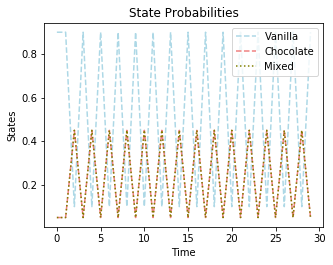

In [10]:
ls = ['--','--',':']
col = ['lightblue','lightcoral','olive']

fig, ax = plt.subplots(figsize=(5, 3.75))

for i in range(3):
    plt.plot(timee, piMat[:,i],ls=ls[i],c=col[i],label=statenames[i])

plt.xlabel('Time')
plt.ylabel('States')
plt.title('State Probabilities')

plt.legend()
plt.savefig('MCirreducible.png')
plt.show()

# [2] FixedPointIntegralEquation101

Gibbs Sampler Function

In [11]:
def GibbsSampler(Nobs):
    zmat = np.zeros((Nobs, 2))
    x = 1
    y = 1
    zmat[0,] = [x, y]
    for ii in range(1,Nobs):
        x = np.random.exponential(1/y,1)
        y = np.random.exponential(1/x,1)
        zmat[ii,] = [x, y]
    return zmat

Sampling

In [12]:
Nobs = 1024
burnin = 9000
np.random.seed(199)
dum = GibbsSampler(burnin + Nobs)

GibbsRN = np.zeros((Nobs,2))
for iii in range(Nobs):
    GibbsRN[iii,] = dum[burnin + iii,]
GibbsRN

array([[  2.35913160e+43,   2.40576398e-44],
       [  2.89743495e+43,   2.31299950e-45],
       [  5.27438196e+44,   3.28765266e-46],
       ..., 
       [  2.71087320e+61,   1.40649955e-63],
       [  1.04188649e+63,   2.41919444e-63],
       [  5.61824896e+62,   2.24277844e-63]])

Plotting

In [13]:
time2 = [burnin + i for i in range(1,Nobs+1)]
timee2 = [[element] for element in time2]
#GibbsData = np.append(timee2, GibbsRN, axis=1)

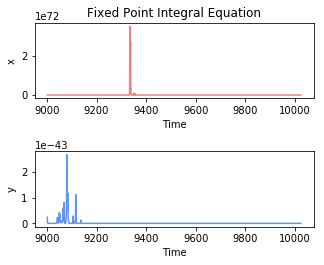

In [14]:
fig, ax = plt.subplots(figsize=(5, 3.75))

plt.subplot(211)
plt.plot(timee2, GibbsRN[:,0],ls='-',c='lightcoral')

plt.xlabel('Time')
plt.ylabel('x')
plt.title('Fixed Point Integral Equation')

plt.subplot(212)
plt.plot(timee2, GibbsRN[:,1],ls='-',c='cornflowerblue')

plt.xlabel('Time')
plt.ylabel('y')


plt.subplots_adjust(hspace = 0.7)
plt.savefig('FixedPointIntegralEstimation.png')
plt.show()

# [3] GibbsSamplerLogit102R

In [15]:
import statsmodels as sm
import seaborn as sns

In [16]:
df_mydata = pd.read_csv('SpectorMazzeo.csv')
df_mydata.head()

,OBS,GPA,TUCE,PSI,GRADE
0,1,2.66,20,0,0
1,2,2.89,22,0,0
2,3,3.28,24,0,0
3,4,2.92,12,0,0
4,5,4.00,21,0,1


In [17]:
np_mydata = df_mydata.as_matrix()
np_mydata.shape

(32, 5)

In [18]:
nX = np_mydata.shape[0]
X = np.append(np.ones((nX,1)),np_mydata[:,1:4], axis =1)
y = np_mydata[:,-1]
kX = X.shape[1]
XtX = X.transpose() @ X
Xty = X.transpose() @ y
yty = y.transpose() @ y

Prior

In [19]:
b0 = [-2, 1, 0, 0]
B0 = 2*np.eye(4)

Posterior

In [20]:
# Truncated Logistic Random Number
def trunLogistic(mu, sigma, L, U):
    uRN = np.random.uniform(size=1)
    dumTL =uRN/(1+np.exp(-(U-mu)/sigma)) + (1-uRN)/(1+np.exp(-(L-mu)/sigma))
    trunLogistic = np.log(dumTL/(1-dumTL))
    return trunLogistic

Initials

In [21]:
Nsim = 200
Nburnin = 1000
Nobs = Nsim + Nburnin
Bpost = np.linalg.pinv(np.linalg.pinv(B0) + XtX)
bpost = Bpost @ (np.linalg.pinv(B0) @ b0 + Xty)
ystar = np.zeros(nX)
betaa = np.array(b0)
betaAtotal = np.zeros((Nobs,kX))

GibbsSampler

In [22]:
np.random.seed(199)
for i in range(Nobs):
    for ii in range(nX):
        if y[ii]==1:
            ystar[ii] = trunLogistic(betaa @ X[ii,],1,0,np.inf)
        else:
            ystar[ii] = trunLogistic(betaa @ X[ii,],1,-np.inf,0)
    bpost = Bpost @ (np.linalg.pinv(B0) @ b0 + X.transpose() @ ystar)
    betaa = np.random.multivariate_normal(bpost,Bpost,size=1)
    betaAtotal[i,] = betaa

In [23]:
betaA = betaAtotal[Nburnin:,]

# column means
print('< Column means >')
colmean = np.zeros(kX)
for k in range(kX):
    colmean[k] = np.mean(betaA[:,k])
print(colmean)

# covariance matrix
betaAt = betaA.transpose()
print('< Covariance matrix >')
print(np.cov(betaAt))

< Column means >
[-3.01273743  0.70564778  0.01146053  0.66017684]
< Covariance matrix >
[[ 1.59784426 -0.23649951 -0.037665   -0.02489526]
 [-0.23649951  0.35608536 -0.03814756 -0.01830711]
 [-0.037665   -0.03814756  0.00719054 -0.00377148]
 [-0.02489526 -0.01830711 -0.00377148  0.38142805]]


Plotting

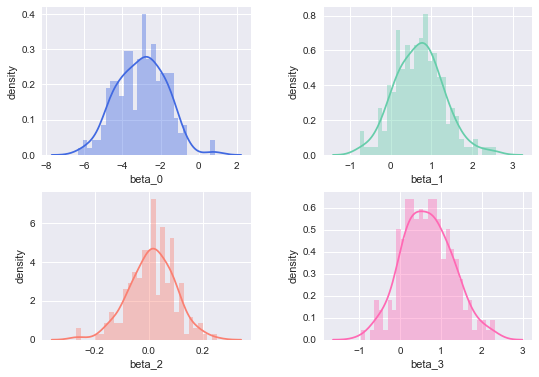

In [24]:
time3 = range(Nsim)
timee3 = [[t] for t in time3]
colors = ["royalblue","mediumaquamarine","salmon","hotpink"]
betas = ["beta_0, beta_1, beta_2, beta_3"]

plt.figure(1)

for k in range(kX):
    plt.subplot(221+k)
    sns.distplot(betaA[:,k],hist=True,bins=30,color=colors[k])
    plt.xlabel('beta_%s' %k)
    plt.ylabel('density')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.savefig('GibbsSamplerLogit102a.png')
plt.show()

In [25]:
from statsmodels.tsa.stattools import acf

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ACF

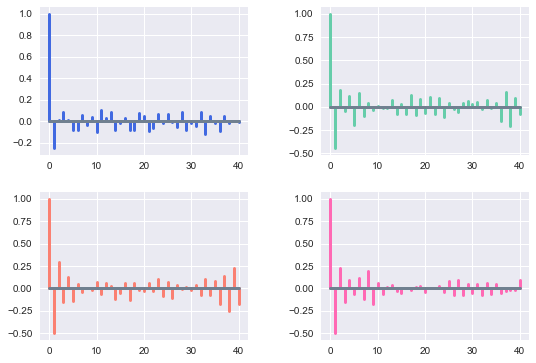

In [26]:
plt.figure(1)

for k in range(kX):
    plt.subplot(221+k)
    (markers, stemlines, baseline) = plt.stem(acf(betaA[:,k]))
    plt.setp(markers, visible = False)
    plt.setp(stemlines, 'linewidth', '3',color = colors[k])
    plt.setp(baseline, 'linewidth', '3', color = "slategray")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.savefig('GibbsSamplerLogit102b.png')
plt.show()